#1 часть

#Аугментация данных
Для обучения нейронной сети у нас есть всего по 15 изображений каждого класса, конечно же такого количества недостаточно, чтобы обучить нейронную сеть.






##Настройка трансформации изображений с помощью ImageDataGenerator
Мы увеличим наш набор данных через трансформацию существующих изображений:
* rotation_range - случайный поворот изображения в указанном диапазоне (0-180);
* width_shift_range/height_shift_range -  смещение изображения по ширине/высоте;
* shear_range - случайное применение сдвигового преобразования;
* zoom_range -  увеличение/уменьшение размера изображения;
* horizontal_flip - случайный поворот изображения вдоль горизонтали.

Стратегия заполнения пикселей после поворота или смещения по умолчанию определяется параметром fill_mode = 'nearest'.
Полный список вариантов возможных трансформаций изображений представлена в документации к библиотеке Keras.

Генерация новых изображений выполняется с помощью класса ImageDataGenerator библиотеки Keras. Загрузим его из модуля c утилитами для обработки изображений: keras.preprocessing.image.

Запишем настройки трансформации изображений с помощью ImageDataGenerator в каталог datagen.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# !unzip 'drive/MyDrive/5/Датасеты-20250319T180530Z-001.zip'

In [7]:
# !unzip 'Датасеты/archive_aug_Data.zip'
# !unzip 'Датасеты/Test.zip'
# !unzip 'Датасеты/Подорожник.zip'
# !unzip 'Датасеты/Береза.zip'

In [8]:
!ls

content  drive	sample_data  Test  Береза  Датасеты  Подорожник


In [9]:
# запишем список файлов  директорий в соответствующие переменные
import os

Birch = os.listdir('Береза')
Goose_grass = os.listdir('Подорожник')

Чтобы посмотреть на созданный список, использем оператор print.

In [10]:
print(Birch)
print(Goose_grass)

['Береза_1.jpg', 'Береза_8.jpg', 'Береза_12.jpg', 'Береза_4.jpg', 'Береза_2.jpg', 'Береза_7.jpg', 'Береза_9.jpg', 'Береза_3.jpg', 'Береза_6.jpg', 'Береза_10.jpg', 'Береза_11.jpg', 'Береза_14.jpg', 'Береза_13.jpg', 'Береза_5.jpg', 'Береза_15.jpg']
['Подорожник_7.jpg', 'Подорожник_15.jpg', 'Подорожник_5.jpg', 'Подорожник_11.jpg', 'Подорожник_1.jpg', 'Подорожник_8.jpg', 'Подорожник_12.jpg', 'Подорожник_2.jpg', 'Подорожник_6.jpg', 'Подорожник_10.jpg', 'Подорожник_4.jpg', 'Подорожник_9.jpg', 'Подорожник_13.jpg', 'Подорожник_3.jpg', 'Подорожник_14.jpg']


Создадим директорию "Data", в которую будем сохранять аугментированные данные. Для этого используем команду mkdir.

In [11]:
!mkdir Data

Убедимся, что директория "Data" создана, для этого используем команду ls (рис. 8).



In [12]:
!ls

content  Data  drive  sample_data  Test  Береза  Датасеты  Подорожник


##Генерация новых изображений

Создадим функцию для генерации новых изображений из исходных изображений подготовленного нами датасета - generating_pictures(img, prefix). Аргументами функции являются исходное изображение (img) и префикс, который будет присваиваться сгенерированному изображению (prefix).

Следует отметить, что изображения должны быть преобразованы из файлов jpeg в тензоры 4-го ранга с вещественными числами. Для этого мы используем метод img_to_array модуля keras.preprocessing.image, чтобы преобразовать изображение в массив (тензор) Numpy и функцию reshape для изменения формы массива.

Мы применяем метод flow, чтобы считать каждое изображение (batch_size=1), применить к ним настроенные трансформации в datagen и сохранить в созданную нами директорию Data с расширением jpeg.

Из каждого исходного изображения мы создадим по 20 трансформированных изображений. Количество генерируемых изображений будем регулировать с помощью счетчика изображений i.

In [13]:
from keras.preprocessing.image import img_to_array

# функция для генерации изображений
def generating_pictures(img, prefix):
  x = img_to_array(img)  # это массив Numpy с формой (канал цвета, высота, ширина)
  x = x.reshape((1,) + x.shape)  # изменение формы массива (количество изображений, канал цвета, высота, ширина)
  i = 0 # счетчик изображений
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/Data/', save_prefix = prefix, save_format='jpeg'):
      i += 1
      if i > 20:
          break  # выход из цикла при i > 20

Создадим словарь Python для формирования аргументов функции generating_pictures - img и prefix. Ключу будет соответствовать путь к изображению, значению - соответствующий префикс для сгенерированного файла.

Создадим путь к файлам датасета "Береза":

In [14]:
# Birch
path_Birch = []
for name in Birch:
  path='/content/Береза/' + name
  path_Birch.append(path)

Создадим путь к файлам датасета "Подорожник":

In [15]:
# Goose_grass
path_Goose_grass = []
for name in Goose_grass:
  path='/content/Подорожник/' + name
  path_Goose_grass.append(path)

Посмотрим на результат (рис. 9, 10).

In [16]:
path_Birch

['/content/Береза/Береза_1.jpg',
 '/content/Береза/Береза_8.jpg',
 '/content/Береза/Береза_12.jpg',
 '/content/Береза/Береза_4.jpg',
 '/content/Береза/Береза_2.jpg',
 '/content/Береза/Береза_7.jpg',
 '/content/Береза/Береза_9.jpg',
 '/content/Береза/Береза_3.jpg',
 '/content/Береза/Береза_6.jpg',
 '/content/Береза/Береза_10.jpg',
 '/content/Береза/Береза_11.jpg',
 '/content/Береза/Береза_14.jpg',
 '/content/Береза/Береза_13.jpg',
 '/content/Береза/Береза_5.jpg',
 '/content/Береза/Береза_15.jpg']

In [17]:
path_Goose_grass

['/content/Подорожник/Подорожник_7.jpg',
 '/content/Подорожник/Подорожник_15.jpg',
 '/content/Подорожник/Подорожник_5.jpg',
 '/content/Подорожник/Подорожник_11.jpg',
 '/content/Подорожник/Подорожник_1.jpg',
 '/content/Подорожник/Подорожник_8.jpg',
 '/content/Подорожник/Подорожник_12.jpg',
 '/content/Подорожник/Подорожник_2.jpg',
 '/content/Подорожник/Подорожник_6.jpg',
 '/content/Подорожник/Подорожник_10.jpg',
 '/content/Подорожник/Подорожник_4.jpg',
 '/content/Подорожник/Подорожник_9.jpg',
 '/content/Подорожник/Подорожник_13.jpg',
 '/content/Подорожник/Подорожник_3.jpg',
 '/content/Подорожник/Подорожник_14.jpg']

Создадим префиксы для сгенерированных файлов - 'Birch' и 'Goose_grass', соответственно для файлов с изображением листьев березы и листьев подорожника.

In [18]:
# создание префикса для новых файлов
prefix_Birch = 'Birch'
prefix_Goose_grass = 'Goose_grass'

Создадим словарь Python для каждого класса изображений с аргументами для функции generating_pictures, используя метод fromkeys. В словаре для каждого класса ключ - путь к имени файла - это аргумент img, значение - соответствующий префикс для нового файла - это аргумент prefix.

In [19]:
# создание словаря с аргументами для функции generating_pictures
dict_Birch = dict.fromkeys(path_Birch, prefix_Birch)
dict_Goose_grass = dict.fromkeys(path_Goose_grass, prefix_Goose_grass)

Далее в цикле присвоим аргументам img и prefix ключ и значение из соответствующего словаря и вызовем функцию для генерации новых изображений. Для загрузки изображений используем функцию load_img.

In [20]:
from keras.preprocessing.image import load_img

# определение аргументов для файлов Birch
for key, value in dict_Birch.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [21]:
# определение аргументов для файлов Goose_grass
for key, value in dict_Goose_grass.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

Посмотрим на список файлов в директории Data и подсчитаем их количество при помощи команды find.

In [22]:
# look at the contents of the directory
print(os.listdir('/content/Data'))

['Birch_0_5754.jpeg', 'Birch_0_7984.jpeg', 'Goose_grass_0_385.jpeg', 'Birch_0_2999.jpeg', 'Birch_0_7490.jpeg', 'Goose_grass_0_9561.jpeg', 'Birch_0_4992.jpeg', 'Goose_grass_0_5849.jpeg', 'Goose_grass_0_1900.jpeg', 'Goose_grass_0_7702.jpeg', 'Birch_0_5948.jpeg', 'Birch_0_784.jpeg', 'Goose_grass_0_7449.jpeg', 'Goose_grass_0_8548.jpeg', 'Goose_grass_0_6434.jpeg', 'Goose_grass_0_7258.jpeg', 'Birch_0_7489.jpeg', 'Goose_grass_0_8192.jpeg', 'Goose_grass_0_5940.jpeg', 'Birch_0_3211.jpeg', 'Goose_grass_0_2036.jpeg', 'Birch_0_2283.jpeg', 'Birch_0_1471.jpeg', 'Birch_0_8519.jpeg', 'Goose_grass_0_5264.jpeg', 'Goose_grass_0_5872.jpeg', 'Birch_0_3972.jpeg', 'Birch_0_5693.jpeg', 'Goose_grass_0_2440.jpeg', 'Goose_grass_0_7209.jpeg', 'Goose_grass_0_4986.jpeg', 'Goose_grass_0_9166.jpeg', 'Goose_grass_0_351.jpeg', 'Birch_0_4218.jpeg', 'Goose_grass_0_16.jpeg', 'Birch_0_7041.jpeg', 'Goose_grass_0_925.jpeg', 'Birch_0_3745.jpeg', 'Goose_grass_0_9456.jpeg', 'Birch_0_5676.jpeg', 'Birch_0_3545.jpeg', 'Goose_grass

In [23]:
# подсчет файлов в директории
!find /content/Data -type f| wc -l

617


Итак, мы создали новый датасет  путем трансформации исходных изображений.

##Просмотр новых изображений

Посмотрим на случайное изображение сгенерированных файлов при помощи метода imshow библиотеки matplotlib.

Запустите этот код несколько раз, чтобы убедиться, что ваши новые изображения выглядят реалистично. Эти изображения мы будем использовать для обучения нейронной сети, поэтому их реалистичность важна, чтобы корректно распознавать новые тестовые изображения, которые обученная нейроная сеть ранее не видела.

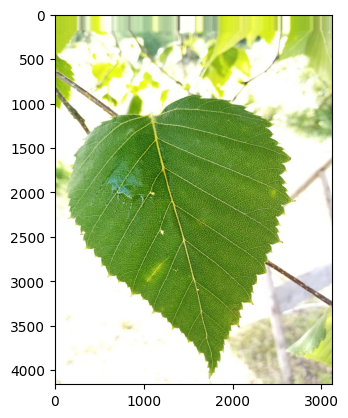

In [24]:
# загрузим необходимые ресурсы
import matplotlib.pyplot as plt
import random
# поместим список новых файлов в переменную filenames
filenames = os.listdir('/content/Data')
# выберем случайный файл
sample = random.choice(filenames)
image = load_img("/content/Data/" + sample)
# посмотрим на изображение
plt.imshow(image)

##Упаковка архива с новыми данными

Упакуем директорию Data с новыми файлами в архив zip с именем archive_aug_Data.

In [26]:
# создание архива zip (сжатие от 1 до 9)
# !zip -r -9 archive_aug_Data /content/Data/*

In [27]:
!ls

archive_aug_Data.zip  content  Data  drive  sample_data  Test  Береза  Датасеты  Подорожник


#2 Часть. Классификация изображений

Итак, мы создали набор данных для обучения нейронной сети на основе аугментации исходных изображений. Новые изображения находятся в директории Data, для этой директории нами был создан список файлов filenames, который мы будем далее использовать. В нашем случае новый датасет Data содержит 619 изображений.

Если вы планируете сразу решать задачу классификации, то двигайтесь далее по этому руководству, следуя указаниям.

Также мы создали архив из директории Data - archive_aug_Data.zip, который сохранили  на Google-диске, чтобы использовать его в будущем для обучения нейронной сети.
В случае использования архива  archive_aug_Data.zip вам необходимо предварительно выполнить следующие действия:

1. Подключить ваш Google-диск, как мы уже делали это ранее:

from google.colab import drive

drive.mount('/content/drive')

2. Загрузить архив с данными archive_aug_Data.zip, используя команду cp  и указав путь к расположению архива на вашем Google-диске:

!cp '/content/drive/My Drive/.../Датасеты/archive_aug_Data.zip' archive_aug_Data.zip

3. Распаковать архив:

!unzip archive_aug_Data.zip

4. Создать список файлов распакованной директории Data:

filenames = os.listdir('/content/content/Data')

Обратите внимание на указание пути к имени директории или файла. Путь копируется при нажатии правой кнопки мыши на выбранный файл во вкладке Файлы справа (рис. 15).
В случай возникновения ошибки Erno, вам необходимо проверить путь к указанному файлу или директории.


In [28]:
# импортируем модуль os для работы с файловой системой
import os
# создадим список файлов распакованной директории Data
filenames = os.listdir('/content/content/Data')

In [29]:
# посмотрим на список файлов
filenames

['Birch_0_9265.jpeg',
 'Birch_0_8144.jpeg',
 'Birch_0_1847.jpeg',
 'Goose_grass_0_7400.jpeg',
 'Goose_grass_0_9604.jpeg',
 'Birch_0_3262.jpeg',
 'Birch_0_1452.jpeg',
 'Birch_0_3580.jpeg',
 'Birch_0_8570.jpeg',
 'Goose_grass_0_6007.jpeg',
 'Birch_0_7785.jpeg',
 'Goose_grass_0_7640.jpeg',
 'Goose_grass_0_4723.jpeg',
 'Goose_grass_0_4007.jpeg',
 'Goose_grass_0_7107.jpeg',
 'Goose_grass_0_2259.jpeg',
 'Goose_grass_0_7198.jpeg',
 'Goose_grass_0_3821.jpeg',
 'Birch_0_4698.jpeg',
 'Birch_0_5547.jpeg',
 'Goose_grass_0_6750.jpeg',
 'Goose_grass_0_2153.jpeg',
 'Goose_grass_0_1393.jpeg',
 'Birch_0_8697.jpeg',
 'Birch_0_1855.jpeg',
 'Birch_0_695.jpeg',
 'Birch_0_9369.jpeg',
 'Birch_0_1291.jpeg',
 'Goose_grass_0_1634.jpeg',
 'Birch_0_814.jpeg',
 'Goose_grass_0_5911.jpeg',
 'Goose_grass_0_3638.jpeg',
 'Birch_0_4614.jpeg',
 'Birch_0_3254.jpeg',
 'Birch_0_7935.jpeg',
 'Goose_grass_0_3902.jpeg',
 'Birch_0_6895.jpeg',
 'Goose_grass_0_6317.jpeg',
 'Goose_grass_0_5547.jpeg',
 'Goose_grass_0_53.jpeg',
 'Go

#Подготовка данных для нейронной сети



Итак, у нас есть датасет, который мы создали на основе реальных изображений с помощью аугментации данных.

Для классификации изображений мы будем использовать способ обучения нейронной сети - обучение с учителем. Для этого нам необходимо выполнить разметку наших изображений и указать к какому классу относится каждое изображение. Это означает, что каждому изображению будет соответствовать правильный ответ, который и должна научиться предсказывать нейронная сеть.

Правильные ответы называются метками, по-английски - labels.

Так как мы будем учить нейронную сеть разделять изображения на два класса, соответственно и меток у нас будет две. Давайте определим метку для изображений листьев подорожника (Goose_grass) - 1, для листьев березы (Birch) - 0.

##Разметка

Для реализации разметки файлов, используем его имя файла - если в имени файла есть слово "Birch" (Береза), то поставим ему в соответствие метку 0, иначе - метку 1.

Для поиска в имени файла соответствующего слова используем метод split. Имя файла представляет собой строку, состоящую из имени и расширения, разделенные точкой. Методом split мы разбиваем строку на части, используя разделитель точку. Имя файла в строке имеет индекс [0]. Соотвественно, применим метод  split к каждому имени файла, используя цикл. Метки для каждого файла будем записывать в список categories, используя метод append().

Данные с именами файлов (filename) и их меток (category) определим в таблицу (датафрейм) с именем df, которую создадим при помощи библиотеки Pandas.  Pandas - это библиотека на языке Python, которая служит для анализа и обработки данных.

Код для реализации этих действий представлен ниже.


In [30]:
import pandas as pd
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if 'Birch' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Посмотрим на первые 5 записей созданного датафрейма df, используя команду head().

In [31]:
# head() по умолчанию возвращает первые 5 записей
df.head()

filename  category
0        Birch_0_9265.jpeg         0
1        Birch_0_8144.jpeg         0
2        Birch_0_1847.jpeg         0
3  Goose_grass_0_7400.jpeg         1
4  Goose_grass_0_9604.jpeg         1

Видим, что разметка произведена верно, файлам, которые содержат в своем имени "Birch" соответствует метка "0", а файлам, содержащим в своем имени "Goose_grass" - метка "1".

Применим метод info(), чтобы получить общую информацию о датафрейме df. Видим, что в таблице представлены 2 колонки "filename" и "category" с общим количеством данных в каждой - 619. Тип данных в "filename" - строковый, в  "category" - целочисленный.

In [32]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  619 non-null    object
 1   category  619 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


Можем посчитать количество меток, равных 1, используя функцию sum().  

In [33]:
# сумма значений в столбце 'category' по строкам (axis=0)
df['category'].sum(axis=0)

np.int64(312)

Для визуализации меток построим столбчатую диаграмму при помощи методов value_counts() и plot.bar().

<Axes: xlabel='category'>

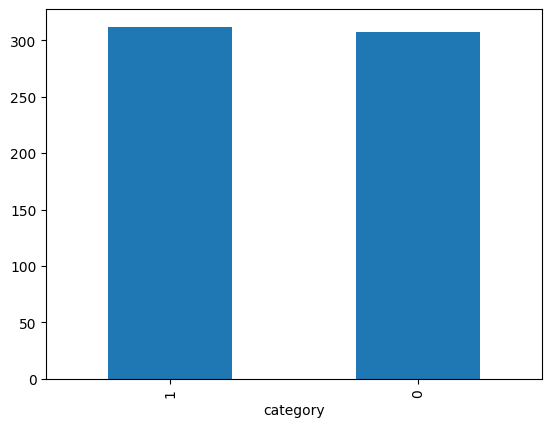

In [34]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot.bar()

Видим, что мы имеем сбалансированный датасет с равным количеством данных по классам - для изображений листьев подорожника (Goose_grass) - 1, для листьев березы (Birch) - 0. Это особенно важно для небольшого датасета, как в нашем случае, чтобы нейронная сеть равномерно обучилась на всех данных.

#Определение параметров входных изображений

Нейронные сети работают с данными, представленными в виде чисел. Изображение можно представить как набор пикселей с номером цвета в палитре от 0 до 255.

Все изображения нашего датасета имеют разный размер, поэтому нам необходимо привести их к единому формату. Определим ширину и высоту изображений в переменные IMAGE_WIDTH и IMAGE_HEIGHT, соответственно. Формат изображения запишем в переменную IMAGE_SIZE. Кроме формата, каждое изображение имеет еще одно измерение - это цвет, которое называется каналом цвета. Наши изображения являются цветными, поэтому оно будет представлено тремя цветовыми каналами RGB - Red-Green-Blue, соответственно параметр канала цвета равен трем: IMAGE_CHANNELS=3.

Данные для нейронной сети имеет особую структуру. Они представлены в виде тензоров. Тензор можно представить как контейнер для данных с произвольным количеством осей или измерений, в которых размещаются  данные.  Изображения подаются в виде четырехмерных тензоров с формой (количество образцов, высота, ширина, количество каналов цвета).

In [35]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

#Построение модели нейронной сети

Для построения модели нейронной сети применяем библиотеку Keras, которая входит в состав фреймворка Tensorflow.

Лучшим подходом для обработки изображений считается применение сверточных нейронных сетей как разновидности моделей глубокого обучения.Как отмечает разработчик Keras Франсуа Шолле, создание моделей глубокого обучения стало подобно конструктору LEGO, где важно эффективно собрать совместимые слои в конвейер для обработки данных. Библиотека Keras является достаточно простой в применении и на ее основе уже создано большое количество готовых моделей, которые позволяют использовать нейронные сети для решения практических задач.

Для решения нашей задачи используем модель сверточной нейронной сети, представленной на платформе Kaggle в соревновании «Dogs vs. Cats» как шаблона для решения задачи по классификации наших изображений.

Основным блоком в нейронной сети является слой, который принимает и обрабатыает данные. Мы используем класс Sequential, чтобы создать многослойную модель нейронной сети последовательного типа.

Для создания слоев применим следующие модули:

- Conv2D - для создания сверточных слоев;
- BatchNormalization - для создания слоя пакетной нормализации, как метода ускорения и повышения стабильности нейронных сетей, предложенного  С. Иоффе и К. Сегеди в 2015 году;
- MaxPooling2D - для создания слоя подвыборки, снижающего пространственную размерность данных;
- Dropout - метод регуляризации, который позволяет случайным образом исключить некоторые нейроны из обучения с указанной вероятностью;
- Dense -  для создания полносвязных слоев;
- Flatten - для создания переходного слоя от Conv2D к Dense;

В модели нейронной сети выходное значение нейрона определяется функцией активации. Мы используем функцию активации Relu во всех слоях, кроме последнего. На последнем слое - функция активации - softmax, которая позволяет определить вероятность принадлежности конкретного изображения к одному из классов.



Итак, загружаем необходимые модули для построения модели нейронной сети.

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import Sequential

Построим модель Sequential(), состоящую из трех блоков со сверточными слоями Conv2D и 1 блока с полносвязными слоями Dense. Эта модель представлена на рис. Первые три блока состоят из сверточного слоя Conv2D, слоев BatchNormalization, MaxPooling2D и Dropout.
Количество фильтров для каждого сверточного слоя удваивается, соответственно, 32, 64 и 128. Задача первых трех блоков - извлечение признаков из изображений. Последний блок выполняет роль классификатора.

После последнего сверточного слоя выходное изображение преобразуется в одномерный вектор слоем Flatten для передачи данных в полносвязный слой Dense. Последний слой Dense содержит два нейрона, так как решается задача классификации на два класса - лист березы и лист подорожника.




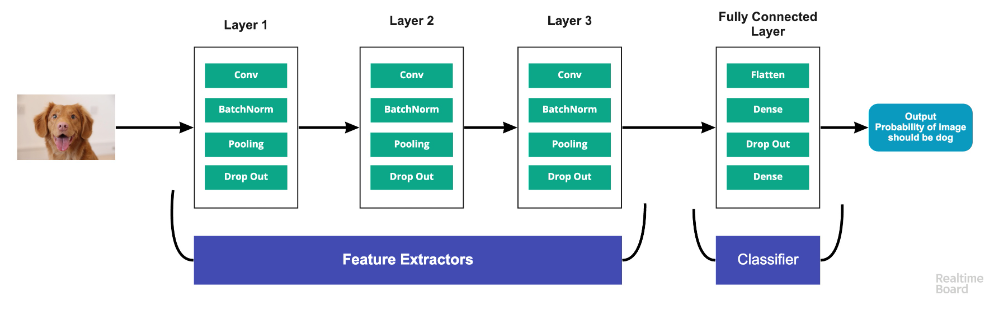

Рис. Модель нейронной сети для классификации кошек и собак. Решается задача определения вероятности того, что на изображении - собака.

https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

Далее следует шаг компиляции модели, на котором мы настраиваем процесс обучения.
Для этого необходимо определить следующие параметры:
- функция потерь (loss) или целевая функция оценивает отклонение результатов обучения нейронной сети от ожидаемых (потери). Это позволяет корректировать обучение в направлении минимизации потерь. От того, что будет выбрано в качестве целевой функции зависит и результат обучения нейронной сети. Для задачи классификации, как правило,используется функция потерь 'categorical_crossentropy', которая вычисляет расстояние между распределением вероятности на выходе сети и заданным распределением меток;

- оптимизатор (optimizer) реализует основной алгоритм глубокого обучения - алгоритм обратного распространения ошибки - механизм, с помощью которого нейронная сеть обновляет так называемые веса - параметры обучения - на основе данных, получаемых от функции потерь и настройки скорости обучения. Существуют несколько видов оптимизаторов, которые реализуют разные алгоритмы оптимизации на основе вычисления градиента, чтобы достичь наилучшего результата по нахождению минимума функции потерь. Мы будем использовать optimizer='rmsprop'.

- метрика (metrics) служит для мониторинга качества предсказаний на этапе обучения и тестирования.  Мы используем метрику 'accuracy', которая определяется как доля правильно классифицированных изображений. Будем называть ее точностью предсказания.


Построим модель нейронной сети из описанных ранее слоев.
Для вывода архитектуры нейронной сети используется метод summary().

Расчет параметров для каждого слоя представлен в приложении 1.

In [39]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Обратите внимание, используя эту архитектуру нейронной сети мы получаем 12 941 314 параметров для обучения.

#Подготовка обучающей и проверочной выборок

Мы используем ImageDataGenerator и метод flow_from_dataframe, чтобы подавать данные в нейронную сеть во время ее обучения. Параметр class_mode='categorical' отвечает за класс каждого изображения, который нужно научить предсказывать нейронную сеть.
При использовании этого аргумента, все значения в столбце датафрейма 'category' должны иметь строковый тип, поэтому выполним замену меток со значением 0 на 'Birch', а 1 - на 'Goose_grass', используя метод replace.

In [40]:
df['category'] = df['category'].replace({0: 'Birch', 1: 'Goose_grass'})

Для отслеживания параметров процесса обучения нейронной сети разделим наш датафрейм на две части - обучающие train_df и проверочные validate_df данные (выборки). При помощи обучающей выборки мы будем обучать нейронную сеть, а при помощи проверочной выборки контролировать насколько хорошо она обучилась во время процесса обучения.
Для разделения исходного набора данных df применим метод train_test_split, который позволяет разделить датафрейм на части случайным образом. Определим размер проверочных данных равный 20% при помощи параметра test_size.

Параметр random_state позволяет откорректировать баланс между распределением данных и сохранить повторяемость случайного распределения при повторном запуске кода.

Применим функцию reset_index к созданным выборкам, чтобы переиндексировать строки, так как выборки были сформированы случайным образом.

In [41]:
from sklearn.model_selection import train_test_split
# Создание обучающей и проверочной выборок
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=21)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Посмотрим на распределение изображений в обучающей выборке train_df.

<Axes: xlabel='category'>

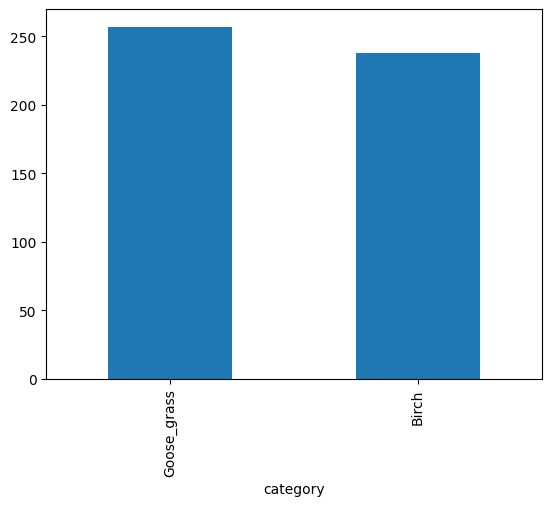

In [42]:
train_df['category'].value_counts().plot.bar()

Посмотрим на распределение изображений в проверочной выборке validate_df.

<Axes: xlabel='category'>

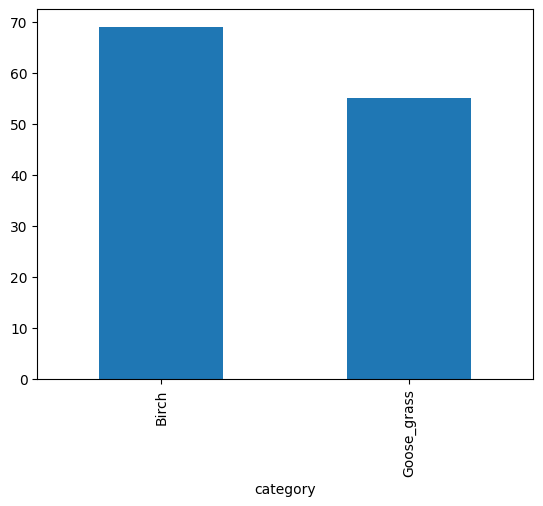

In [43]:
validate_df['category'].value_counts().plot.bar()

Запишем количество данных полученных датафреймов в переменные total_train и total_validate, используя атрибут .shape. Атрибут .shape возвращает кортеж из количества строк и столбцов датафрейма. Соответственно, shape[0] вернет нам количество строк в каждом из датафреймов.

Данные в нейронную сеть мы будем подавать так называемыми мини-пакетами, размер которых определим в параметре batch_size.

In [44]:
# обучающие и проверочные данные
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
# batch_size
batch_size=15

Посмотрим на количество данных в обучающей и проверочной выборках.

In [45]:
print("Количество данных для обучения:", total_train)
print("Количество данных для оценки точности модели нейронной сети во время обучения:", total_validate)

Количество данных для обучения: 495
Количество данных для оценки точности модели нейронной сети во время обучения: 124


#Callbacks

Процесс обучения нейронной сети можно регулировать, используя модуль tensorflow.python.keras.callbacks, который включает в себя так называемые встроенные обратные вызовы. Мы будем использовать следующие обратные вызовы:
- EarlyStopping - чтобы остановить процесс обучение, если точность обучения на проверочной выборке не будет улучшаться в течение 5 эпох обучения (patience=5);
- ReduceLROnPlateau - чтобы регулировать скорость обучения, если точность обучения  на проверочной выборке не будет улучшаться в течение 2 эпох обучения (patience=2);
- ModelCheckpoint - будем сохранять лучшую модель в ходе обучения, ориентируясь на 'val_accuracy'.

In [54]:
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=2,
                                            factor=0.5)
modelCheckpoint = ModelCheckpoint("model-cnn.h5",
                                  monitor='val_accuracy',
                                  verbose=2,
                                  save_best_only=True)


Сохраним обозначенные обратные вызовы в список callbacks, чтобы впоследствии передать их как аргумент метода fit для обучения модели.

In [55]:
callbacks = [earlystop, learning_rate_reduction, modelCheckpoint]

#ImageDataGenerator для обучающих и проверочных данных

Итак, мы уже говорили, что используем ImageDataGenerator и метод flow_from_dataframe, чтобы подавать данные в нейронную сеть во время ее обучения. Класс ImageDataGenerator автоматически преобразовывает файлы с изображениями в данные в форме тензоров, которые ожидает получить нейронная сеть.

Кроме того, пиксели исходных изображений необходимо преобразовать из диапазона [0, 255] в диапазон [0, 1]. Это называется нормализацией входных данных и выполняется с помощью параметра для масштабирования значений пикселей изображения rescale=1./255.

Также применим небольшие случайные преобразования к изображениям, что позволит нам расширить данные во время обучения за счет того, модель не увидит одно и то же изображение дважды. Этот прием позволяет создать дополнительные обучающие данные из имеющихся изображений путем их трансформации. Параметры для трансформации изображений мы уже обсуждали в разделе "Аугментация данных".

Аргументами для метода flow_from_dataframe  в случае обучающей выборки являются:
- train_df - датафрейм с данными для обучения;
- "/content/Data/" - путь к директории с данными;
- x_col='filename' - данные датафрейма с файлами;
- y_col='category' - данные датафрейма с метками;
- target_size=IMAGE_SIZE - параметры изображения;
- class_mode ='categorical' - связан с параметром y_col для определения класса изображения;
- batch_size - размер мини-пакета данных для подачи в нейронную сеть для обучения.

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 495 validated image filenames belonging to 2 classes.


Видим, что в обучающей выборке имеется 495 изображений, принадлежащих к двум классам.

Аналогичные действия выполним для проверочной выборки.

In [63]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 124 validated image filenames belonging to 2 classes.


Видим, что в проверочной выборке сейчас имеется 124 изображения, принадлежащих к двум классам.

Посмотрим как работает ImageDataGenerator на обучающей выборке. Выберем для этого три изображения и визуализируем их с помощью инструментов библиотеки matplotlib.

In [64]:
example_df = train_df.sample(n=3).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 3 validated image filenames belonging to 1 classes.


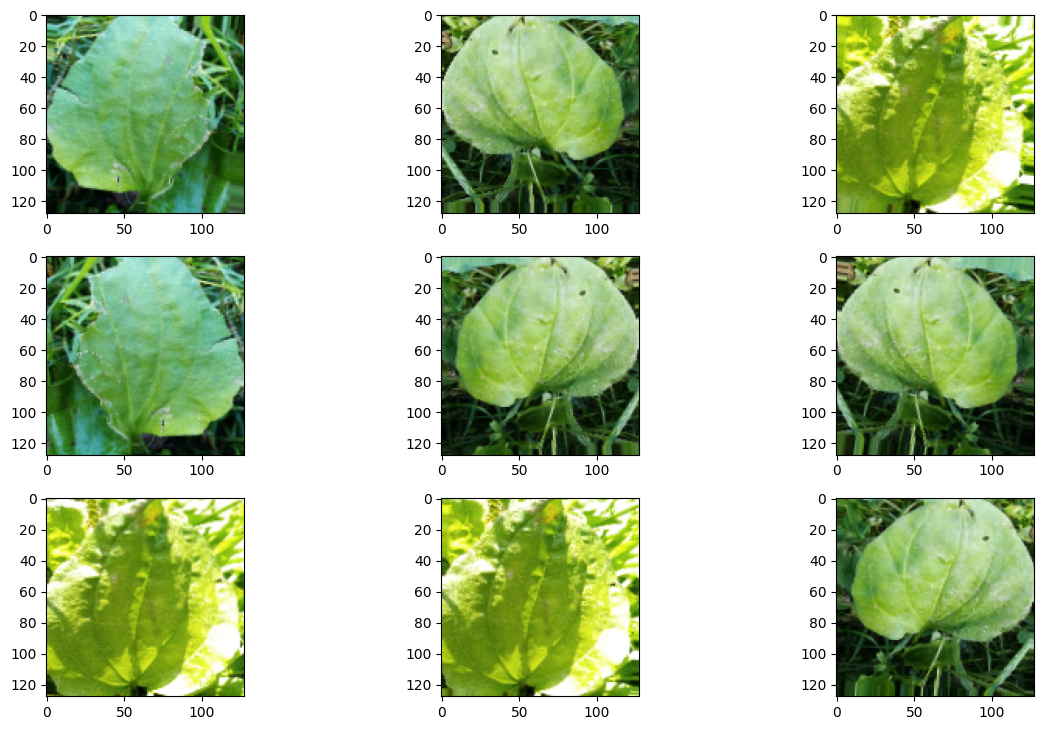

In [65]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#Обучение модели

Для обучения модели нейронной сети мы используем метод fit из библиотеки
Keras. Исходные данные для передачи в модель мы уже подготовили ранее с помощью генератора ImageDataGenerator (см. раздел "ImageDataGenerator для обучающих и проверочных данных").

Итак, в качестве параметров в метод fit мы передаем:
- train_generator - обучающая выборка;
- epochs - количество итераций, которое будет выполнено по всем обучающим данным;
- validation_data=validation_generator - проверочная выборка;
- validation_steps=total_validate//batch_size - количество пакетов данных, извлекаемых из генератора проверочных данных определяемое как общее количество проверочных данных деленное (целочисленно) на размер batch_size;
- steps_per_epoch=total_train//batch_size - количество шагов за одну эпоху, исходя из общего количества данных обучающей выборки и размера мини-пакета batch_size;
- callbacks - список callbacks для управления процессом обучения и сохранения лучшего результата модели.

Контроль обучения модели нейронной сети происходит при помощи следующих параметров:
- 'loss' - функция потерь на обучающей выборке;
- 'val_loss'- функция потерь на проверочной выборке;
- 'accuracy' - точность модели на обучающей выборке;
- 'val_accuracy' - точность модели на проверочной выборке;
- 'lr' - скорость обучения (аргумент оптимизатора).

Все эти параметры записываются в процессе обучения модели в объект history, который возвращается при вызове model.fit.

В ходе обучения вы можете видеть, что отображается номер эпохи.
Мы можем видеть как меняются значения 'loss', 'val_loss', 'accuracy' и
'val_accuracy'.

Видим, как работают заданные нами функции обратного вызова callbacks, а именно:
- запись лучшего результата отслеживается по значению 'val_accuracy', например, "val_accuracy improved from 0.79167 to 0.95833, saving model to model-cnn.h5";
- уменьшается скорость обучения, если не улучшается значение 'val_accuracy' в течение двух эпох: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.




In [66]:
epochs = 5

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9964 - loss: 0.0057 - val_accuracy: 0.5333 - val_loss: 2.6286
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9979 - loss: 0.0043 - val_accuracy: 0.9583 - val_loss: 0.1615
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9960 - loss: 0.0041 - val_accuracy: 0.4917 - val_loss: 3.5518
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9919 - loss: 0.0069 - val_accuracy: 0.9917 - val_loss: 0.0183
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8583 - val_loss: 0.3122


Обратите внимание, на значение 'val_accuracy' после завершения обучения модели. Если 'val_accuracy' ниже 90% (0.9), запустите обучение повторно.

Итак, мы реализовали процесс обучения нейронной сети с учителем, используя библиотеку Keras.
Вспомним основные этапы:
1. Мы создали обучающий датасет и определили для него целевые метки (класс изображения).
2. Мы подготовили данные для обучения с использованием ImageDataGenerator в форме тензоров, которые ожидает получить нейронная сеть.
3. Мы построили модель для обучения нейронной сети.
4. Мы настроили процесс обучения через выбор функции потерь, оптимизатора, метрики, параметров для мониторинга и функций обратного вызова (callbacks).
5. Мы реализовали итерации по обучающим данным через вызов метода fit() модели.

Здесь мы можем посмотреть на параметры модели, о которых упоминали ранее.

In [68]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Посмотрим на все значения, которые принимала метрика 'accuracy' во время обучения.

In [69]:
history.history['accuracy']

[0.9959595799446106,
 0.9959595799446106,
 0.9979798197746277,
 0.9979798197746277,
 1.0]

Найдем максимальное значение 'accuracy'.

In [70]:
max(history.history['accuracy'])

1.0

Посмотрим на все значения, которые принимала метрика 'val_accuracy' во время обучения.

In [71]:
history.history['val_accuracy']

[0.5333333611488342,
 0.9583333134651184,
 0.49166667461395264,
 0.9916666746139526,
 0.8583333492279053]

Найдем максимальное значение 'val_accuracy'.

In [72]:
max(history.history['val_accuracy'])

0.9916666746139526

Видим, что значения метрик 'val_accuracy' и  'accuracy' равны 1. Т.е. мы можем предположить, что обучаемая нами модель научилась безошибочно распознавать изображения.
Но еще рано делать выводы, давайте визуализируем процесс обучения при помощи инструментов библиотеки matplotlib.

Построим графики для функции потерь и точности на обучающей и проверочной выборках.  

#Визуализация обучения

In [73]:
import numpy as np

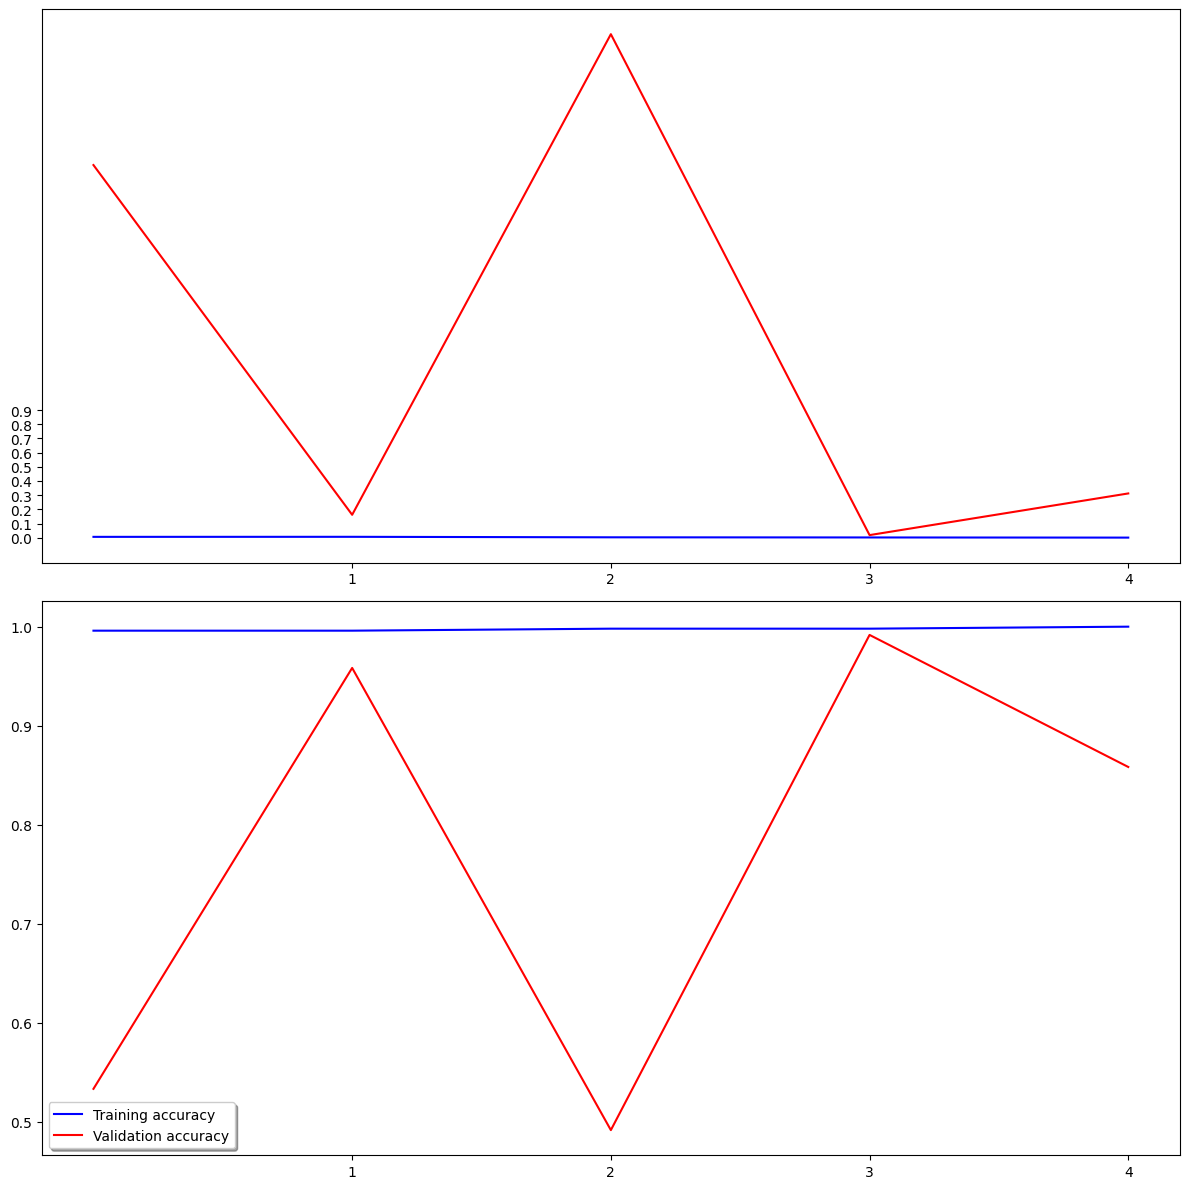

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Видим, что на определенном этапе точность на проверочной выборке стала выше, чем на обучающей. Это может говорить о переобучении модели, когда она модель теряет способность к обобщению.

Так же можно сделать вывод о количестве эпох для обучения, их можно сделать меньше и попробовать обучить еще раз.

Чтобы проверить как обучилась наша нейронная сеть, покажем ей данные, которые она никогда не видела - тестовый набор, который мы подготовили ранее.

#Подготовка тестовых данных

Загрузим архив с тестовыми данными с Google-диска, используя команду !cp, указав путь к имени файла в кавычках (или апострофах)  и имя самого файла Test.zip.

Видим, что все файлы находятся в директории Test.

Посмотрим на списоск файлов и директорий, которые сейчас есть в Colaboratory.

Сформируем список test_filenames тестовых файлов из директории Test, которая находится в Colaboratory с помощью метода  listdir модуля os.

In [76]:
test_filenames = os.listdir('Test')

Посмотрим на содержание списка test_filenames.

In [77]:
test_filenames

['IMG_20200813_175718.jpg',
 'IMG_20200813_180355.jpg',
 'IMG_20200813_175309.jpg',
 'IMG_20200813_180254.jpg',
 'IMG_20200813_175741.jpg',
 'IMG_20200813_180216.jpg',
 'IMG_20200813_175951.jpg',
 'IMG_20200813_180108.jpg',
 'IMG_20200813_175803.jpg',
 'IMG_20200813_175753.jpg']

Посчитаем количество файлов в директории Test.

In [78]:
# подсчет количества файлов в директории
!find /content/Test -type f| wc -l

10


Видим, что для тестирования обученной модели нейронной сети у нас есть 10 файлов.

Поместим эти тестовые файлы в датафрейм Pandas, как мы уже делали это для обучающего набора данных ранее. Но в этом случае, мы делаем разметку данных, так как ожидаем предсказание от обученной нами модели нейронной сети.

Датафрейм test_df имеет только одну колонку 'filename' с файлами для тестирования.



In [79]:
test_df = pd.DataFrame({
    'filename': test_filenames
})

Количество тестовых файлов запишем в переменную 'nb_samples'.

In [80]:
nb_samples = test_df.shape[0]

Посмотрим на первые пять строк содержимого датафрейма test_df.

In [81]:
test_df.head()

filename
0  IMG_20200813_175718.jpg
1  IMG_20200813_180355.jpg
2  IMG_20200813_175309.jpg
3  IMG_20200813_180254.jpg
4  IMG_20200813_175741.jpg

Подготовим данные для тестирования модели с помощью ImageDataGenerator и метода flow_from_dataframe, аналогично как мы делали это для обучающей и проверочной выборок.

Но в случае тестовых данных мы не будем их трансформировать и перемешивать (shuffle=False), а только масштабируем их с помощью параметра rescale=1./255.
Обратите внимание, что y_col=None и class_mode=None не определены, так как тестовые данные не имеют меток, которые определяют их класс.

Так как тестовых данных у нас всего 10 файлов, мы не будем разбивать их на мини-пакеты, а подадим их все сразу, задав параметр batch_size=10.


In [82]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/Test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=10,
    shuffle=False
)

Found 10 validated image filenames.


Итак, у нас в наличии 10 файлов с изображениями.

Применим метод predict, чтобы предсказать класс для каждого изображения. Параметрами метода являются:
- данные test_generator, сформированные нами ранее с помощью ImageDataGenerator и метода flow_from_dataframe;
- steps - количество итераций для прогноза результатов, определяемых как общее количество тестовых данных nb_samples деленное на размер мини-пакета  batch_size. В нашем случае это будет одна итерация, так как размер мини-пакета мы определили равным общему количеству тестовых файлов. Функция ceil библиотеки numpy возвращает наименьшее целое для числа итераций.



In [86]:
predict = model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Метод predict возвращает значения прогнозируемых меток (классов) в виде массива numpy.
Посмотрим на форму массива, используя метод shape.




In [87]:
predict.shape

(10, 2)

Видим, что массив представлен в виде матрицы, в которой 10 строк и 2 столбца, что соответствует 10 тестовым файлам и двум значениям вероятности принадлежности изображения к одному из двух классов, предсказанных моделью нейронной сети.

Первый столбец имеет индекс [0], соответственно в нем находится вероятность предсказания класса с меткой = 0.

Второй столбец имеет индекс [1], соответственно в нем находится вероятность предсказания класса с меткой = 1.

Мы имеем два значения вероятности, так как решаем задачу классификации изображений для двух классов.

Посмотрим на значения предсказанных данных.

In [88]:
predict

array([[9.9999988e-01, 9.7278551e-08],
       [2.6424186e-08, 1.0000000e+00],
       [9.9999857e-01, 1.4654041e-06],
       [9.2555729e-18, 1.0000000e+00],
       [9.9995768e-01, 4.2264215e-05],
       [1.0030007e-04, 9.9989974e-01],
       [5.4058364e-06, 9.9999464e-01],
       [5.3346469e-08, 1.0000000e+00],
       [9.9841428e-01, 1.5857464e-03],
       [9.9601173e-01, 3.9882166e-03]], dtype=float32)

Итак, мы видим, что предсказанные значения для тестовых данных представлены в виде массива данных - матрицы, где в каждой строке представлены вероятности предсказания  классов для соответствующего тестового изображения.

Вспомним, что вероятность для класса с меткой 0 (Birch - Береза, label=0) - это первая позиция элемента в строке массива, что соответствует столбцу с индексом позиции = 0.

Вероятность для класса с меткой 1 (Goose_grass - Подорожник, label=1) - это вторая позиция элемента в строке массива, , что соответствует столбцу с индексом позиции = 1.

Там где находится максимальное значение вероятности и соответствует предсказанию класса для каждого изображения согласно индексу позиции соответствующего значения вероятности.

Давайте проанализируем значения вероятности для первой строки массива:

[9.9980301e-01, 1.9698901e-04].

Видим, что максимальное значение вероятности (9.9980301e-01) находится в позиции с индексом = 0. Следовательно делаем вывод, что модель нейронной сети предсказывает это изображение, как принадлежащее к классу 0, т.е. к классу - Birch - Береза с label=0.

Аналогичный вывод делаем для 2-й, 3-й и 4-й строк - модель предсказывает, что на изображениях листья березы - класс 0.

А вот уже в 5-й строке [1.0107638e-18, 1.0000000e+00], мы видим, что максимальное значение вероятности находится в позиции с индексом [1], т.е. модель здесь предсказывает класс изображения = 1, что соотвествует листьям подорожника.

Применим функцию argmax библиотеки Numpy, чтобы извлечь максимальное значение вероятности, предсказанное для каждого изображения (по строкам - axis=1).

In [89]:
test_df['category'] = np.argmax(predict, axis=1)

Конвертируем предсказанные метки в названия классов для удобной визуализации предсказаний, сделанной моделью нейронной сети.

Для этого предварительно применим метод class_indices к обучающей выборке train_generator, созданной нами ранее, который позволяет получить доступ к словарю, где приведены в соответствие имя класса и соответствующий ему индекс.

In [90]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 0: 'Birch', 1: 'Goose_grass'})

#Визулизация предсказанных классов изображений

Посчитаем количество предсказаний по каждому классу и визуализируем их с помощью инструментов библиотеки matplotlib.

<Axes: xlabel='category'>

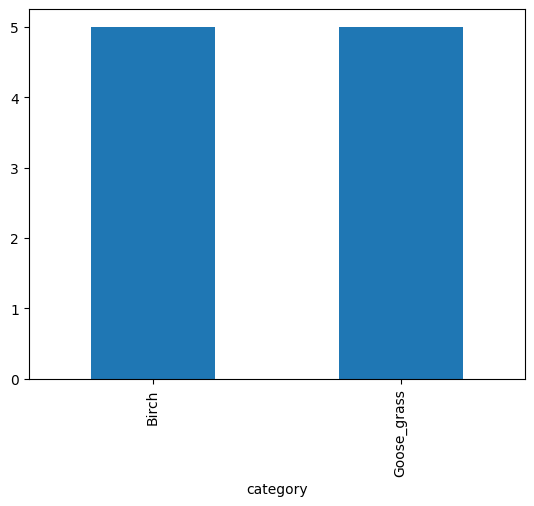

In [91]:
test_df['category'].value_counts().plot.bar()

Видим, что модель предсказала класс с листьями березы для 6 изображений, а класс с листьями подорожника - для 4 изображений.

Таким образом, точность предсказания составляет 90%. Значит модель ошибочно приняла изображение с листьями подорожника за изображение с листьми березы.

Давайте посмотрим на изображения и сделанные к ним предсказания.


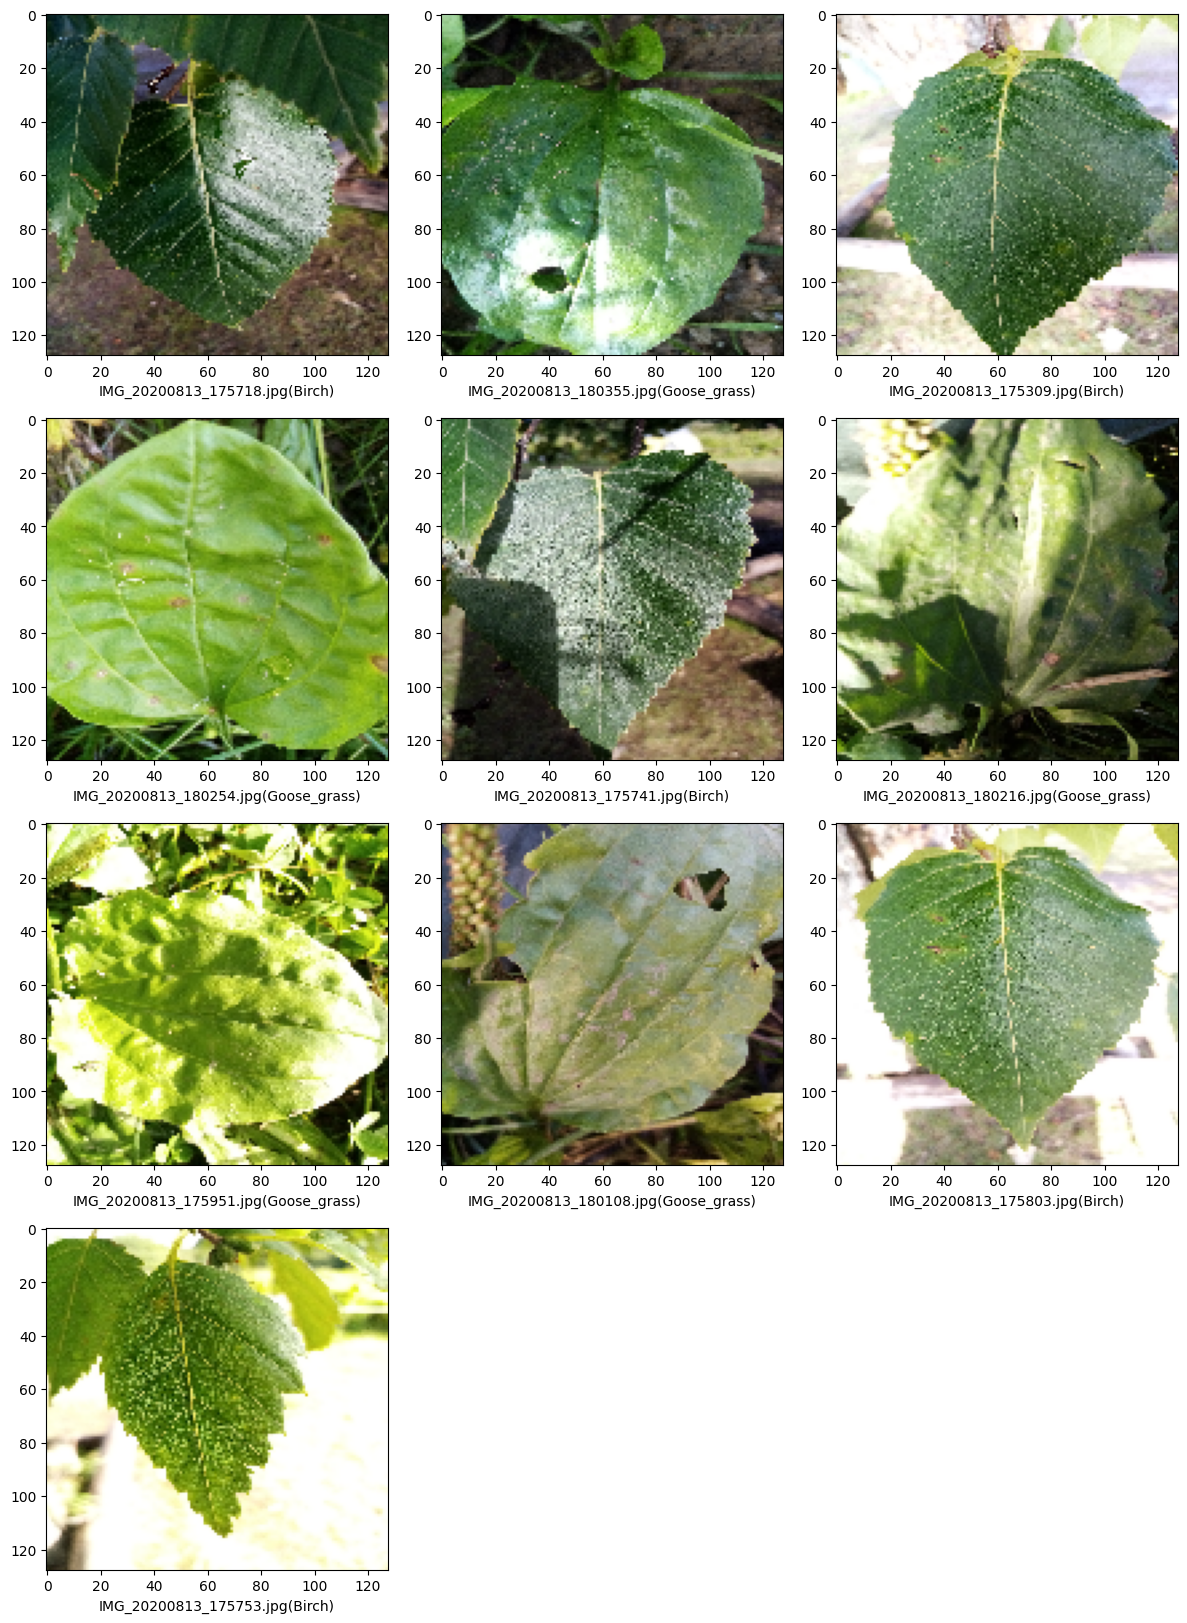

In [92]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Видим, что действительно на третьем изображении - лист подорожника, и он очень похож на лист березы, соответственно модель приняла его за лист березы.

Это ошибочное предсказание связано с одной стороны с небольшим датасетом, который мы использовали для обучения модели нейронной сети, а с другой стороны подчеркивает важность отбора соответствующих изображений для обучения.

Для остальных изображений их класс предсказан верно.


Теперь вы сможете применять применять библиотеку Keras для решения практической задачи классификации изображений.

#Эксперименты с архитектурой нейронной сети


Итак, мы применили готовую модель нейронной сети, которая использовалась для классификации изображений кошек и собак. Однако, для обучения этой модели обучающий набор данных состоял из 25 000 изображений животных. Как вы помните наш обучающий датасет состоял из 495 изображений. Применяемая нами модель сработала для классификации наших изображений, но как вы могли заметить при обучении модели, точность на проверочных данных val_accuracy сначала остановилась на значении около 50% и только после повторного запуска удалось достигнуть 1, т.е. 100%. Однако, на тестовых данных результат классификации составил 90%, т.е. точность на проверочной выборке не подтвердилось.

С чем это может быть связано? Как мы уже отметили, мы обучали модель на небольшом датасете и наблюдали эффект переобучения. Один из способов уменьшить эффект переобучения - это увеличить количество данных. Однако при том же наборе данных избежать переобучение можно за счет уменьшения емкости модели, т.е. количества обучаемых параметров.
Емкость модели или размер модели определяется количеством слоев в архитектуре нейронной сети и количеством фильтров или нейронов в каждом слое, в зависимости от типа слоя - полносязный или сверточный.
Как вы помните в используемой нами архитектуре нейронной сети было 12 941 314 параметров для обучения.

Давайте изменим архитектуру следующим образом:
- оставим только первый блок со сверточных слоем;
- сократим количество полносвязных слоев и оставим только слой для предсказания классов изображений.

In [93]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(2, activation='softmax')) # 2 класса

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │         254,018 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 255,042 (996.26 KB)

 Trainable params: 254,978 (996.01 KB)

 Non-trainable params: 64 (256.00 B)

Видим, что наша упрощенная модель имеет 254,978 параметра для обучения.

Обучим эту модель нейронной сети на тех же данных в течение 5 эпох (epochs = 5).

In [94]:
epochs = 5

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8915 - loss: 0.7238 - val_accuracy: 0.9917 - val_loss: 0.0206
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9931 - loss: 0.0918 - val_accuracy: 0.7417 - val_loss: 1.2338
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9916 - loss: 0.1913 - val_accuracy: 0.9833 - val_loss: 0.0310
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9960 - loss: 0.0459 - val_accuracy: 0.9083 - val_loss: 0.3453
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 5.6005e-07 - val_accuracy: 0.9500 - val_loss: 0.1349


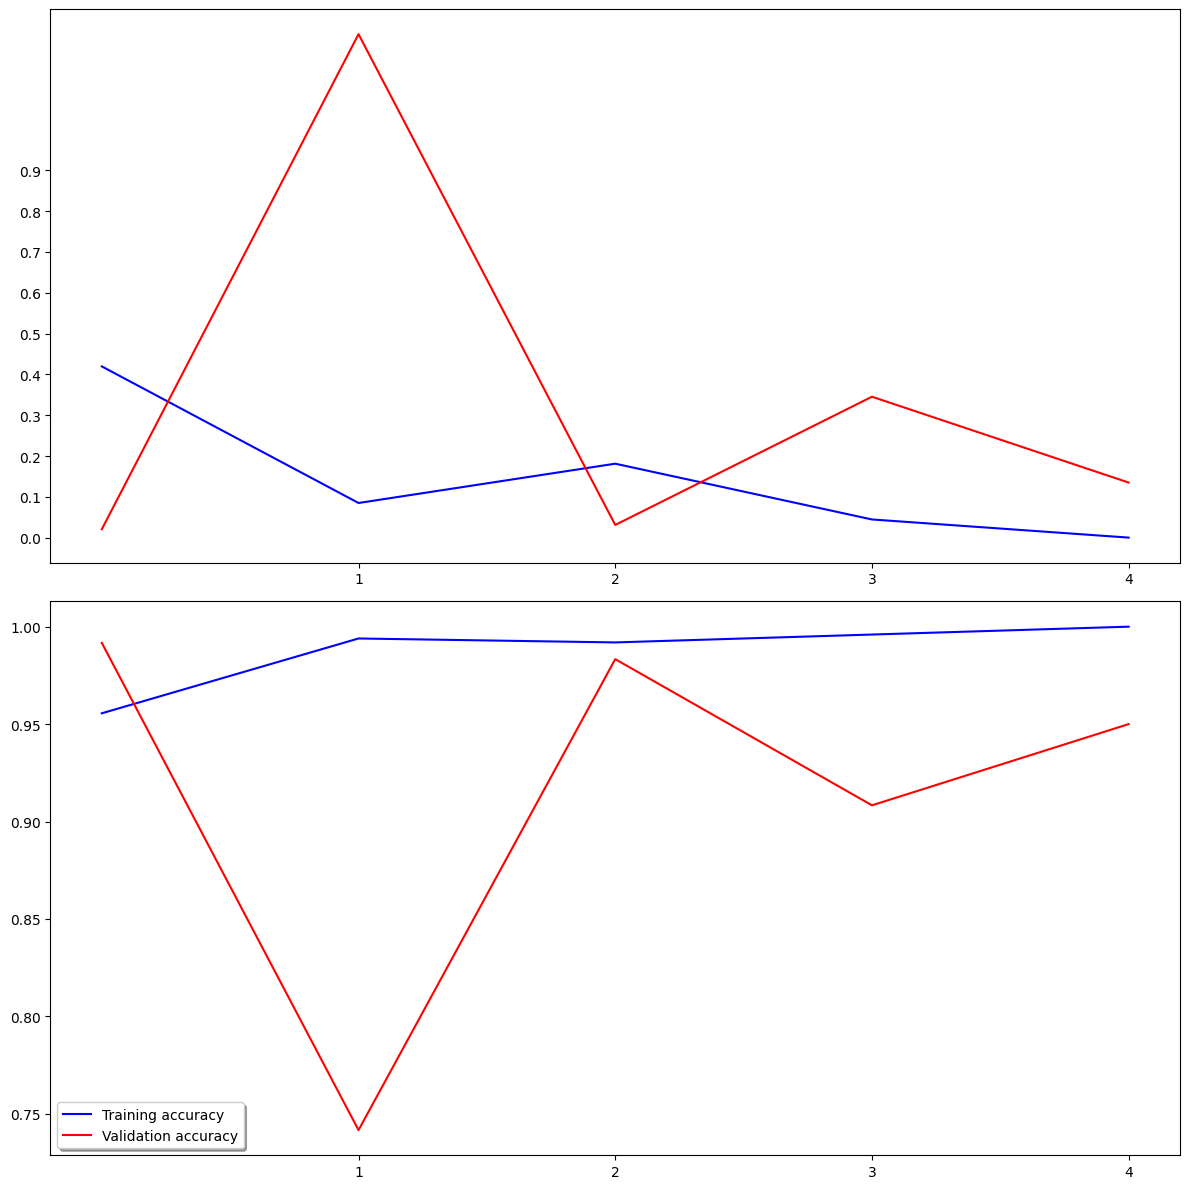

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()